In [27]:
import cv2 
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
# read images
img1 = cv2.imread("scene0711_00_frame-001680.jpg")  
img2 = cv2.imread("scene0711_00_frame-001995.jpg") 

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)



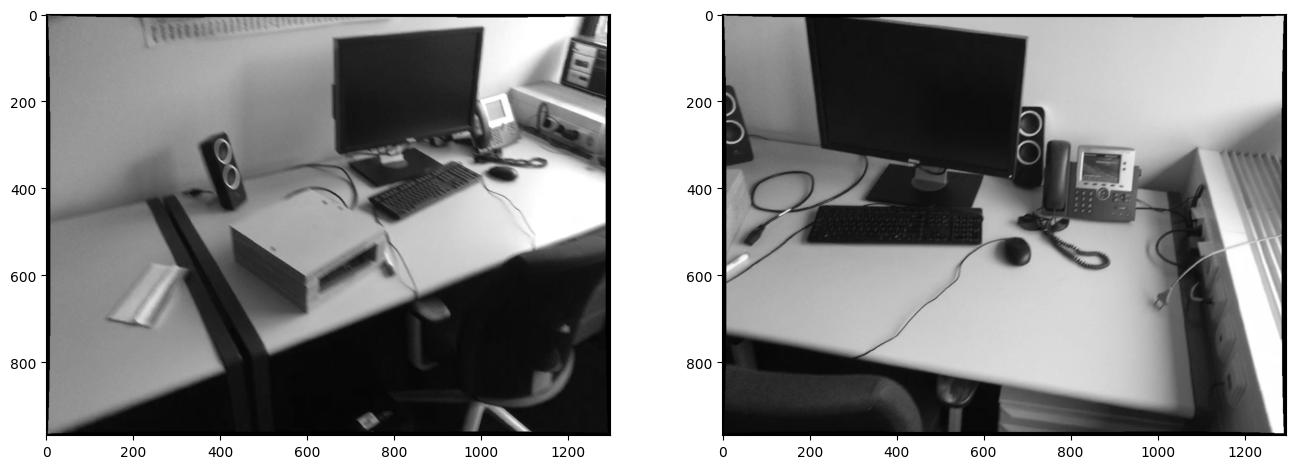

In [29]:
figure, ax = plt.subplots(1, 2, figsize=(16, 8))
ax[0].imshow(img1, cmap='gray')
ax[1].imshow(img2, cmap='gray')


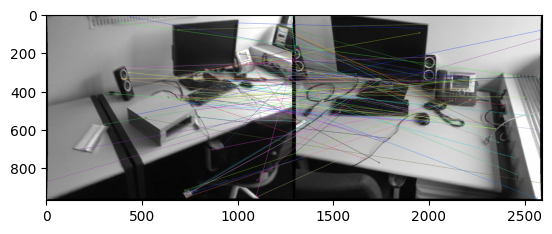

(<matplotlib.image.AxesImage at 0xffff4c0fac70>, None)

In [33]:


#sift
sift = cv2.xfeatures2d.SIFT_create()

keypoints_1, descriptors_1 = sift.detectAndCompute(img1,None)
keypoints_2, descriptors_2 = sift.detectAndCompute(img2,None)

#feature matching
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)

matches = bf.match(descriptors_1,descriptors_2)
matches = sorted(matches, key = lambda x:x.distance)

img3 = cv2.drawMatches(img1, keypoints_1, img2, keypoints_2, matches[:100], img2, flags=2)
plt.imshow(img3),plt.show()

In [31]:
from typing import Tuple
def get_point(idx: int) -> Tuple[Tuple[float, float], Tuple[float, float]]:
    return keypoints_1[matches[idx].queryIdx].pt, keypoints_2[matches[idx].trainIdx].pt

In [32]:
get_point(1)

((112.45122528076172, 8.127750396728516),
 (112.1938247680664, 8.000832557678223))